### Step 0: Import Libraries and Data

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [84]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

### Step 1: Exploratory Data Analysis

In [85]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [86]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


As the test set doesn't have the "Survived" column, we can only split the training set to validate the accuracy of the model. Hence, we'll ignore the test set for now, until we want to submit the solution to Kaggle.

In [87]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Yasbeck, Mrs. Antoni (Selini Alexander)",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [88]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [90]:
print(pd.isnull(df_train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### Initial Thoughts About Features

1. **Drop** "PassengerID" has no influence on whether a passenger survives or not, and should be removed.

2. **Label** "Survived" contains the labels of whether a passenger survives or not, where '1' is survived and '0' is deceased.

3. **Keep** "Pclass" is the ticket class, and there are 3 categories. It was observed that passengers of the upper class were more likely to survive, and this should be correlated with the ticket class, as the upper class can afford more expensive ticket class. Theefore, this is an important feature.

4. **Drop** "Name" of the passenger should not be related to survival, but the title in the name is a potentially useful feature. However, "Mr" and "Miss" are already represented by "Sex", so these are not so important. Also, if the title is an indication of class, this is already represented by the "Pclass" feature. To avoid having too many features, I shall drop this feature.

5. **Keep** "Sex" is an important feature, as women were found to be more likely to survive than men. As it's categorized by the strings "male" and "female", we'll use the get_dummies() function to separate them into '1' for female and '0' for male

6. **TBD** "Age" is tricky to predict. On one hand, it can be assumed that the elderly would be less likely to survive. On the other hand, they might be prioritized to board the life boats, increasing their odds of survival. Also, there should be 891 rows but "Age" only has 714. We need to decide if we want to discard or impute the missing "Age" values, and also look at how age affects survivability.

7. **TBD** "SibSp" is the number of siblings / spouses aboard the Titanic for a passenger. 

8. **TBD** "Parch" is the number of parents / children aboard the Titanic. I believe that "SibSp" and "Parch" can be lumped together to reduce the total number of features, to represent the total number of "Family" members of each passenger. While it can be assumed that passengers would try to keep their families together, I don't think it can be assumed that a family is likely to survive together or perish together. Also, the relationship between "Family" and "Survived" is hard to ascertain. We need to plot some diagrams to figure this out.

9. **Drop** "Ticket" is the ticket number. Some are purely numeric, while others are alphanumeric. "Ticket" is probably linked to factors like when and where the ticket was bought, which are irrelevant features. "Ticket" is also probably linked to the class or cabin type which is an important feature, but is already represented in "Pclass". Thus, I think this feature can be dropped.

10. **Drop** "Fare" is the price of the ticket. I believe that this is related to "Pclass" and can be dropped.

11. **Drop** "Cabin" only has 204 rows out of 891 rows. It's hard to impute with such a great difference, and regretfully this feature should be dropped. This is a pity as I suspect there is a correlation with the position/level of the cabin and survivability.

12. **TBD** "Embarked" is the port of embarkation, represented by 3 different characters. We need to take a closer look to see if this is an important feature. To note that there are 2 missing values that we need to drop or impute.

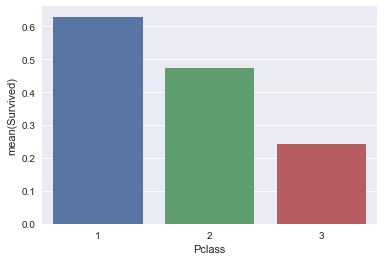

In [91]:
# Examine relationship between 'Pclass' and 'Survived'
sns.barplot(x='Pclass',y='Survived', data=df_train, ci=None)

It's quite obvious that a disproportionately higher number of passengers from Pclass=1 survived over Pclass=2, and even more so than Pclass=3. This is a hugely important feature to keep.

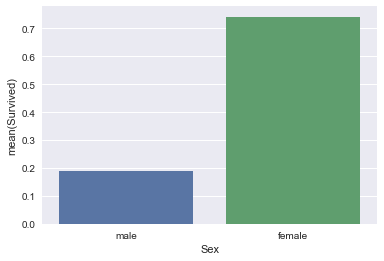

In [92]:
# Examine relationship between 'Sex' and 'Survived'
sns.barplot(x='Sex',y='Survived', data=df_train, ci=None)

As predicted, most females survived while most males perished. This is an important feature to keep too.

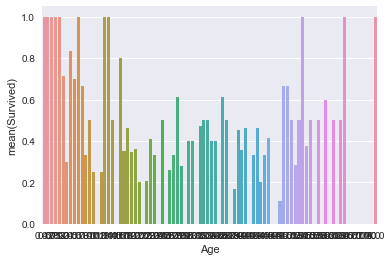

In [93]:
# Examine relationship between 'Age' and 'Survived'
sns.barplot(x='Age',y='Survived', data=df_train, ci=None)

It looks like majority of the children survived, while most of the young to middle aged adults did not. Therefore, "Age" is an important feature that should be kept.

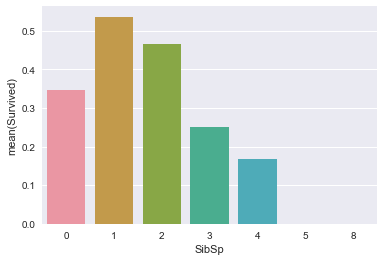

In [94]:
# Examine relationship between 'SibSp' and 'Survived'
sns.barplot(x='SibSp',y='Survived', data=df_train, ci=None)

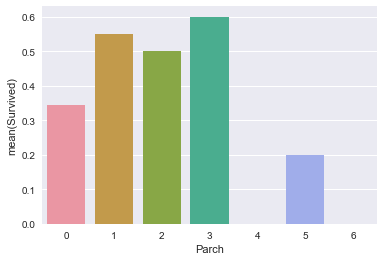

In [95]:
# Examine relationship between 'Parch' and 'Survived'
sns.barplot(x='Parch',y='Survived', data=df_train, ci=None)

There is a definite relationship between "SibSp" and "Survived", as well as "Parch" and "Survived". They do not exhibit the same trend, so we will keep these as separate features instead of combining them as "Family" as previously thought.

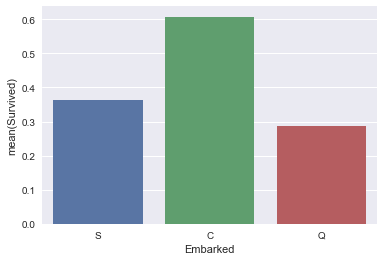

In [116]:
# Examine relationship between 'Embarked' and 'Survived'
sns.barplot(x='Embarked',y='Survived', data=df_train, ci=None)

Looks like for some unknown reason, those who embarked at C have a higher chance of surviving, and therefore this feature should be included.

### Step 2. Cleaning the Data

In [ ]:
# Eliminate the 2 rows with null values for "Embarked"
df_train = df_train[pd.notnull(df_train['Embarked'])]

# Eliminate the 177 rows with null values for "Age"
df_train = df_train[pd.notnull(df_train['Age'])]

It's regretful to have to remove so much data due to null "Age" values, but it's difficult to find a good way to impute the missing values. It does not make sense to fill in mean values of "Age", as we've seen that this age group have the lowest survival rates, and doing so would skew the model even more in favour of this.

In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          183 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [99]:
# Drop the columns discussed in the earlier section
df_train = df_train.drop(['PassengerId','Name','Ticket','Fare','Cabin'], axis = 1)

In [100]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Embarked    712 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 44.5+ KB


The above steps have reduced the DataFrame from 891 rows, 12 columns to 712 rows, 7 columns. Out of these 7 columns, 5 columns contain int64 or float64 which are suitable for ML, but 2 columns contain objects (strings and characters).

As scikit-learn does not accept categorical features by default, we will encode the categorical features numerically by using the pandas get_dummies() method.

In [101]:
df_train_dummies = pd.get_dummies(df_train)
df_train_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


We can drop 2 rows here as they are redundant, for example, Sex_female is the opposite of Sex_male and only one is needed. Similarly for the "Embarked" feature.

In [102]:
df_train_dummies = df_train_dummies.drop(['Sex_male','Embarked_S'], axis = 1)
df_train_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Embarked_C,Embarked_Q
0,0,3,22.0,1,0,0,0,0
1,1,1,38.0,1,0,1,1,0
2,1,3,26.0,0,0,1,0,0
3,1,1,35.0,1,0,1,0,0
4,0,3,35.0,0,0,0,0,0


In [105]:
y = df_train_dummies['Survived'].values
print(y.shape)
X = df_train_dummies.drop("Survived", axis=1).values
print(X.shape)

(712,)
(712, 7)


### Step 3: Model Selection and Tuning

Here, we'll try two classification models, KNeighborsClassifier which is non-linear, and Logistic Regression which is linear.

We'll use a pipeline where the first step is to perform scaling, so that features will be on a similar scale and features on a larger scale won't unduly influence the model. For example, many of the features are 0 or 1, but age ranges from 1 to 80.

Then, 3-fold (default) cross validation is applied, and the best hyperparameters chosen using GridSearchCV.

In [123]:
steps = [("scaler", StandardScaler()),("knn", KNeighborsClassifier())]

pipeline=Pipeline(steps)

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.25, random_state=33, stratify=y)

parameters = {'knn__n_neighbors':np.arange(1,10)}
cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_valid)
print("Tuned hyperparameters: ", cv.best_params_)
print("Training accuracy: ", cv.score(X_train, y_train))
print("Validation accuracy: ", cv.score(X_valid, y_valid))
print(classification_report(y_valid, y_pred))

Tuned hyperparameters:  {'knn__n_neighbors': 4}
Training accuracy:  0.850187265918
Validation accuracy:  0.752808988764
             precision    recall  f1-score   support

          0       0.77      0.83      0.80       106
          1       0.72      0.64      0.68        72

avg / total       0.75      0.75      0.75       178



In [124]:
steps = [("scaler", StandardScaler()),("log_reg", LogisticRegression())]

pipeline=Pipeline(steps)

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.25, random_state=33, stratify=y)

c_space = np.logspace(-5,8,15)
parameters = {'log_reg__C':c_space}
cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_valid)
print("Tuned hyperparameters: ", cv.best_params_)
print("Training accuracy: ", cv.score(X_train, y_train))
print("Validation accuracy: ", cv.score(X_valid, y_valid))
print(classification_report(y_valid, y_pred))

Tuned hyperparameters:  {'log_reg__C': 3.7275937203149381}
Training accuracy:  0.816479400749
Validation accuracy:  0.780898876404
             precision    recall  f1-score   support

          0       0.82      0.81      0.82       106
          1       0.73      0.74      0.73        72

avg / total       0.78      0.78      0.78       178



### Step 4: Conclusion

Using KNN yields a 85.0% training accuracy and 75.3% validation accuracy, while using Logistic Regression yields a lower **81.7% training accuracy** but higher **78.1% validation accuracy**. The larger difference between training and validation accuracies is likely because the non-linear KNN was starting to overfit the data with a more complex boundary, while it looks like a more simple linear boundary by the Logistic Regression model was sufficient and more accurate.